# Machine Learning Exercises - Regression

This notebook will be used to create a regression model from the dataset California House Price, available on Kaggle, using Pandas, NumPy, and Scikit-learn libraries.

In [79]:
# importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Using GitHuB API to import the data on the CSV file.

In [2]:
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/antunes-lima/Machine-Learning-Exercises/main/housing.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1147k  100 1147k    0     0  1511k      0 --:--:-- --:--:-- --:--:-- 1509k


# Exploring The Dataset

Taking the data to a DataFrame.

In [3]:
df = pd.read_csv('/content/housing.csv')

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
df.shape

(20640, 10)

Checking overall info about the values on each numerical column.

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [7]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

Ocean proximity is the only non-numerical column.

In [8]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Checking the histograms of the numerical columns.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efbd3efac10>,
      dtype=object)

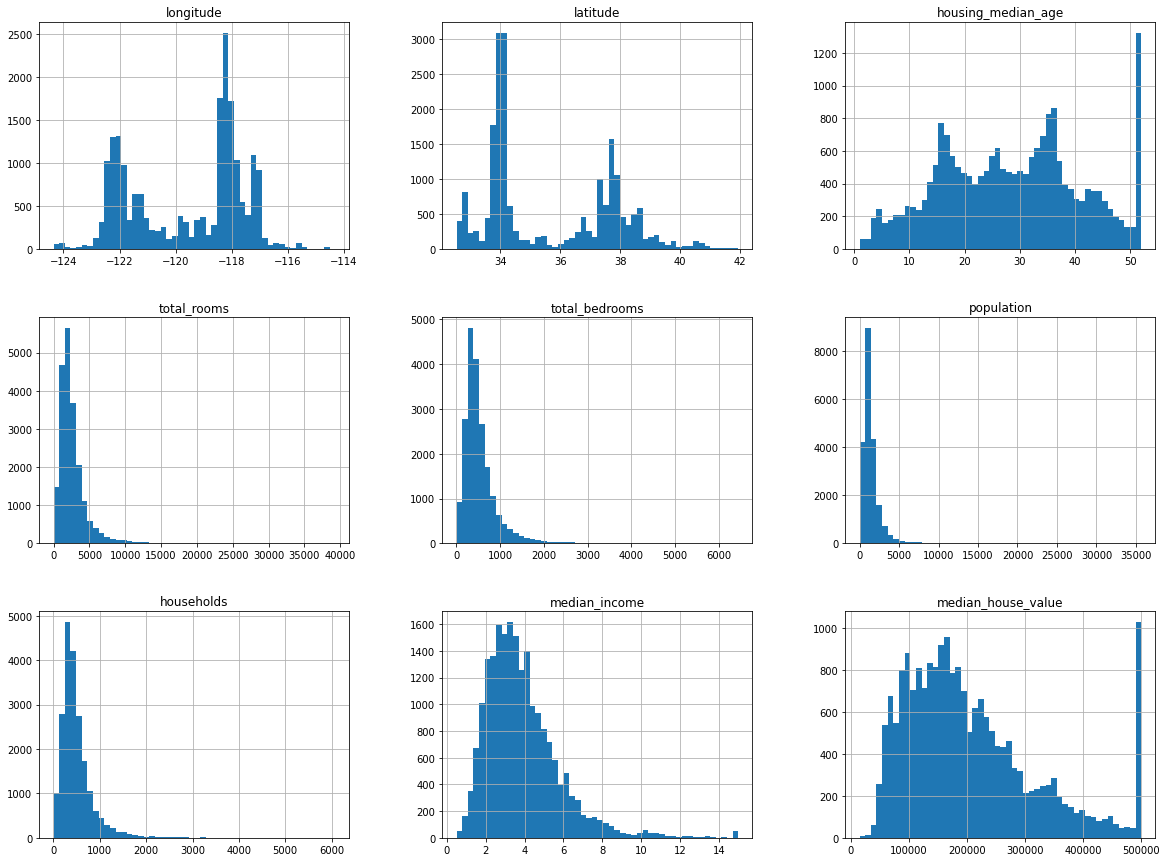

In [9]:
df.hist(bins=50,
        figsize=(20,15) )

Creating a income category column, to use it to stratify the train and test split, in order to guarantee a equal distribution of it in both parts of the split.

In [10]:
df['income_cat'] = pd.cut(df['median_income'],
                          bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                          labels=[1, 2, 3, 4, 5])

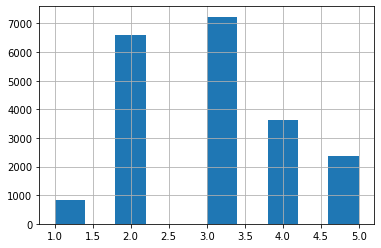

In [11]:
df['income_cat'].hist()

In [12]:
df['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [13]:
df['income_cat'].value_counts(normalize=True)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [14]:
df_strat_train, df_strat_test = train_test_split(df,
                                                 random_state=27,
                                                 test_size=0.2,
                                                 stratify=df['income_cat'])

In [15]:
df_strat_train.shape

(16512, 11)

In [16]:
df_strat_test.shape

(4128, 11)

Confirmation of the distribution of the stratified split.

In [17]:
df_strat_train['income_cat'].value_counts(normalize=True)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

Dropping the income category column, as it was used only to split the data.

In [18]:
df_strat_train = df_strat_train.drop('income_cat',
                                     axis=1)
df_strat_test = df_strat_test.drop('income_cat',
                                   axis=1)

Scatter plot of the latitude and longitude distribution.

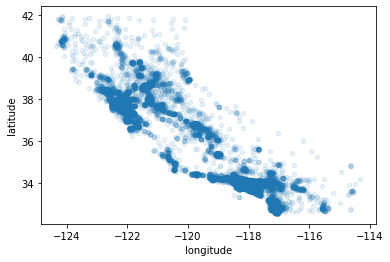

In [19]:
df_strat_train.plot(kind='scatter',
                    x='longitude',
                    y='latitude',
                    alpha=0.1)

Including population and house value on the scatter plot visualization.

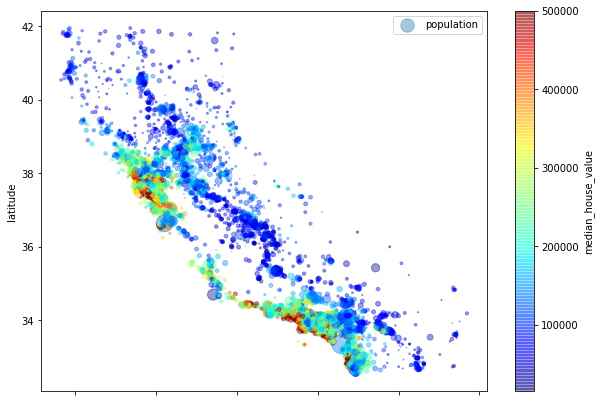

In [20]:
df_strat_train.plot(kind='scatter',
                    x='longitude',
                    y='latitude',
                    alpha=0.4,
                    s=df_strat_train['population']/100,
                    label='population',
                    figsize=(10, 7),
                    c='median_house_value',
                    cmap=plt.get_cmap('jet'),
                    colorbar=True)
plt.legend()

Pair plot of the selected columns, to see the scatter plot between each combination of them. Also shows the histogram of each column.

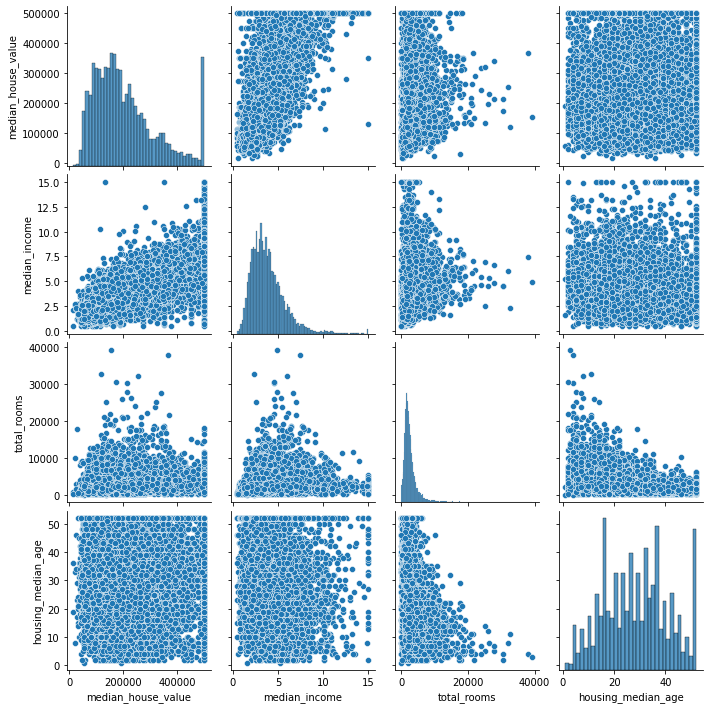

In [21]:
sns.pairplot(df_strat_train[['median_house_value',
                             'median_income',
                             'total_rooms',
                             'housing_median_age']])

# Preparing The Data

Scatter plot of income and house value. Note that house value seems to be capped at 500,000.

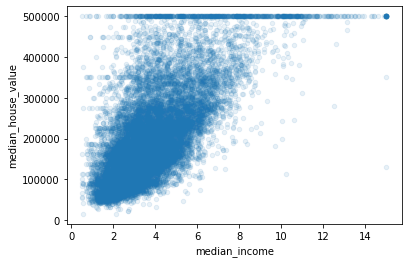

In [22]:
df_strat_train.plot(kind='scatter',
                    x='median_income',
                    y='median_house_value',
                    alpha=0.1)

Correlation heatmap.

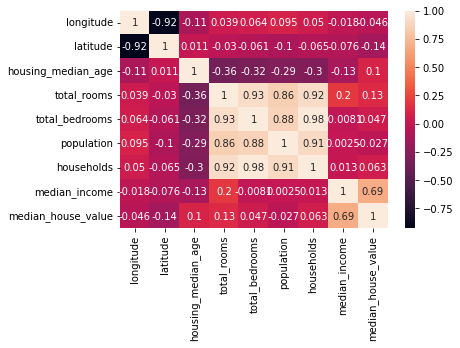

In [23]:
sns.heatmap(df_strat_train.corr(), annot=True)

Creating new columns, combining the values of existing columns.

In [24]:
df_strat_train['rooms_per_household'] = df_strat_train['total_rooms'] / df_strat_train['households']
df_strat_train['bedrooms_per_room'] = df_strat_train['total_bedrooms'] / df_strat_train['total_rooms']
df_strat_train['population_per_household'] = df_strat_train['population'] / df_strat_train['households']

df_strat_test['rooms_per_household'] = df_strat_test['total_rooms'] / df_strat_test['households']
df_strat_test['bedrooms_per_room'] = df_strat_test['total_bedrooms'] / df_strat_test['total_rooms']
df_strat_test['population_per_household'] = df_strat_test['population'] / df_strat_test['households']

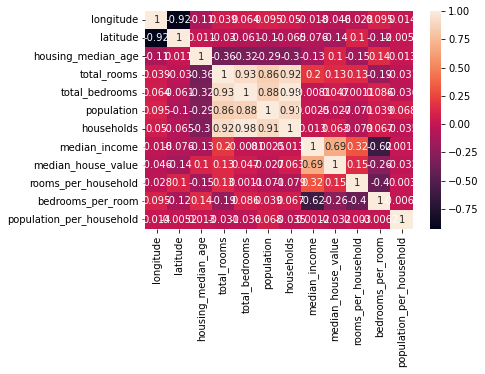

In [25]:
sns.heatmap(df_strat_train.corr(), annot=True)

The bedrooms per room column seems to be more relevant than total_bedrooms andtotal_rooms columns, as it has a higher correlation with house value. In other words, houses with lower bedroom to rooms ratio tend to be more expensive, as it is a negative correlation.

Also, rooms per household is also slightly more informative than total rooms, as larger houses tend to be more expensive.

In [26]:
df_strat_train.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688361
rooms_per_household         0.147888
total_rooms                 0.132752
housing_median_age          0.104282
households                  0.062956
total_bedrooms              0.047036
population                 -0.027283
population_per_household   -0.032108
longitude                  -0.045971
latitude                   -0.143824
bedrooms_per_room          -0.256169
Name: median_house_value, dtype: float64

Spliting the train and test sets into a X and Y sets. Y refers to the value we are going to predict, house value, and X refers to the others columns besides it.

In [27]:
x_strat_train = df_strat_train.drop('median_house_value', axis=1)
y_strat_train = df_strat_train['median_house_value']

x_strat_test = df_strat_test.drop('median_house_value', axis=1)
y_strat_test = df_strat_test['median_house_value']

In [28]:
x_strat_train.shape

(16512, 12)

In [29]:
x_strat_test.shape

(4128, 12)

Filling NA values.

In [30]:
x_strat_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 15114 to 4065
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  int64  
 3   total_rooms               16512 non-null  int64  
 4   total_bedrooms            16351 non-null  float64
 5   population                16512 non-null  int64  
 6   households                16512 non-null  int64  
 7   median_income             16512 non-null  float64
 8   ocean_proximity           16512 non-null  object 
 9   rooms_per_household       16512 non-null  float64
 10  bedrooms_per_room         16351 non-null  float64
 11  population_per_household  16512 non-null  float64
dtypes: float64(7), int64(4), object(1)
memory usage: 2.1+ MB


In [31]:
x_strat_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 11962 to 19759
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 4128 non-null   float64
 1   latitude                  4128 non-null   float64
 2   housing_median_age        4128 non-null   int64  
 3   total_rooms               4128 non-null   int64  
 4   total_bedrooms            4082 non-null   float64
 5   population                4128 non-null   int64  
 6   households                4128 non-null   int64  
 7   median_income             4128 non-null   float64
 8   ocean_proximity           4128 non-null   object 
 9   rooms_per_household       4128 non-null   float64
 10  bedrooms_per_room         4082 non-null   float64
 11  population_per_household  4128 non-null   float64
dtypes: float64(7), int64(4), object(1)
memory usage: 419.2+ KB


Checking the medians of the columns, from the train set.

In [32]:
x_strat_train.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


longitude                   -118.510000
latitude                      34.260000
housing_median_age            29.000000
total_rooms                 2136.000000
total_bedrooms               437.000000
population                  1170.000000
households                   411.000000
median_income                  3.533400
rooms_per_household            5.236263
bedrooms_per_room              0.203209
population_per_household       2.819380
dtype: float64

Filling the NAs with the median value, using the median from the train data. Filling NAs in the test set is also done with the median from the train set.

In [33]:
x_strat_train = x_strat_train.fillna(x_strat_train.median())
x_strat_test = x_strat_test.fillna(x_strat_train.median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [34]:
x_strat_train.isnull().sum(axis=0)

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

Transforming categorical columns. In this case, there is only the ocean proximity column.

In [35]:
x_strat_train.ocean_proximity.value_counts()

<1H OCEAN     7292
INLAND        5243
NEAR OCEAN    2123
NEAR BAY      1850
ISLAND           4
Name: ocean_proximity, dtype: int64

In [36]:
x_strat_train = pd.get_dummies(x_strat_train)

x_strat_test = pd.get_dummies(x_strat_test)

Scalling the data. Robust scaler will be used here, as we have outliers. Standard scaler would not deal well with these outliers.

In [37]:
x_strat_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.582660,35.646923,28.628694,2637.744125,537.258297,1424.568920,499.539668,3.865541,5.435460,0.212796,3.020668,0.441618,0.317527,0.000242,0.112040,0.128573
std,2.006796,2.144633,12.604249,2161.364007,417.067355,1130.297825,380.708688,1.889989,2.574729,0.057600,6.406631,0.496595,0.465528,0.015563,0.315425,0.334737
min,-124.350000,32.540000,1.000000,2.000000,1.000000,5.000000,1.000000,0.499900,0.846154,0.100000,0.692308,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.810000,33.940000,18.000000,1457.000000,299.000000,791.000000,282.000000,2.557475,4.449878,0.175579,2.428945,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.510000,34.260000,29.000000,2136.000000,437.000000,1170.000000,411.000000,3.533400,5.236263,0.203209,2.819380,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.720000,37.000000,3158.000000,644.000000,1727.000000,605.000000,4.740575,6.052554,0.239025,3.277017,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,141.909091,1.000000,599.714286,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
x_strat_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [39]:
x_strat_train.columns[:-5]

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [40]:
num_attributes = x_strat_train.columns[:-5]

x_strat_train[num_attributes].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
15114,-117.00,32.87,18,11544,1979.0,6296,1923,4.4904,6.003120,0.171431,3.274051
4538,-118.20,34.03,41,1292,334.0,1150,322,1.9250,4.012422,0.258514,3.571429
1020,-121.78,37.66,25,1947,418.0,900,354,3.8523,5.500000,0.214689,2.542373
19240,-122.65,38.48,17,1090,164.0,473,163,5.5061,6.687117,0.150459,2.901840
8913,-118.46,34.03,27,1965,631.0,1042,596,2.7500,3.296980,0.321120,1.748322


Transformer fitting, using the training data.

In [41]:
transformer = RobustScaler().fit(x_strat_train[num_attributes])

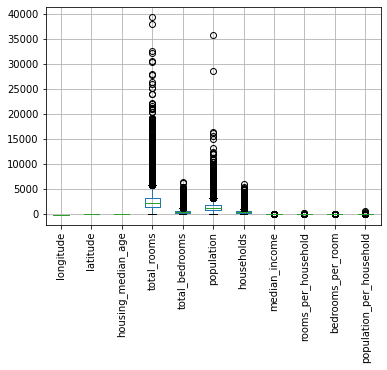

In [42]:
x_strat_train[num_attributes].boxplot(rot=90)

In [43]:
x_strat_train[num_attributes] = transformer.transform(x_strat_train[num_attributes])

x_strat_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15114,0.397368,-0.367725,-0.578947,5.530864,4.469565,5.476496,4.681115,0.438367,0.478486,-0.500857,0.536123,1,0,0,0,0
4538,0.081579,-0.060847,0.631579,-0.496179,-0.298551,-0.021368,-0.275542,-0.736750,-0.763623,0.871688,0.886775,1,0,0,0,0
1020,-0.860526,0.899471,-0.210526,-0.111111,-0.055072,-0.288462,-0.176471,0.146077,0.164561,0.180952,-0.326631,0,1,0,0,0
19240,-1.089474,1.116402,-0.631579,-0.614932,-0.791304,-0.744658,-0.767802,0.903623,0.905270,-0.831409,0.097233,1,0,0,0,0
8913,0.013158,-0.060847,-0.105263,-0.100529,0.562319,-0.136752,0.572755,-0.358848,-1.210028,1.858439,-1.262932,1,0,0,0,0


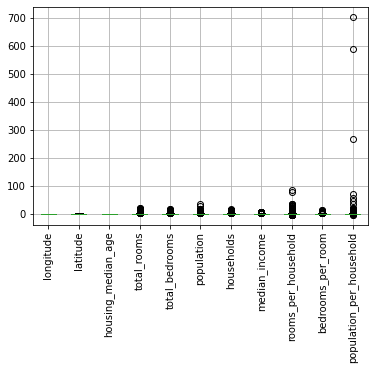

In [44]:
x_strat_train[num_attributes].boxplot(rot=90)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


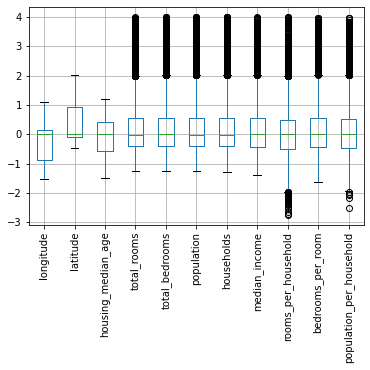

In [45]:
filter_outliers = x_strat_train[num_attributes]<4
x_strat_train[num_attributes][filter_outliers].boxplot(rot=90)

Scalling the test data, also with the transformer fitted using the training data.

In [46]:
x_strat_test[num_attributes] = transformer.transform(x_strat_test[num_attributes])

x_strat_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
11962,0.292105,-0.066138,-0.210526,-0.163433,-0.205797,0.150641,-0.247678,-0.377949,0.235251,-0.098076,1.345812,0,1,0,0,0
8270,0.094737,-0.129630,0.526316,0.171664,0.571014,0.151709,0.622291,-0.372040,-0.791765,0.912768,-0.796617,0,0,0,0,1
8258,0.086842,-0.129630,0.000000,-0.211640,0.489855,0.236111,0.238390,-1.101141,-0.996408,2.175189,0.036589,0,0,0,0,1
3540,0.005263,0.000000,-0.210526,3.676073,4.159420,3.539530,4.136223,0.007466,-0.270995,0.314294,-0.298638,1,0,0,0,0
17017,-0.992105,0.862434,0.473684,0.035861,-0.231884,0.061966,-0.117647,0.887957,0.407954,-0.641712,0.557553,0,0,0,0,1


In [47]:
x_strat_test[num_attributes].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,-0.265232,0.346988,-0.016702,0.289147,0.284816,0.276825,0.274117,0.163892,0.104135,0.162461,0.532057
std,0.523637,0.555569,0.658523,1.329253,1.242284,1.219240,1.203694,0.888072,1.262033,0.915730,22.839980
min,-1.510526,-0.452381,-1.473684,-1.245150,-1.257971,-1.246795,-1.260062,-1.389538,-2.561858,-1.626708,-2.440098
25%,-0.839474,-0.089947,-0.578947,-0.417989,-0.417391,-0.421207,-0.424149,-0.435482,-0.521264,-0.425222,-0.456268
50%,0.013158,-0.007937,0.000000,-0.024985,-0.028986,-0.020299,-0.030960,0.003046,-0.027288,0.000000,-0.005853
75%,0.134211,0.902116,0.421053,0.570988,0.591304,0.582265,0.592105,0.558552,0.507710,0.591478,0.566459
max,1.063158,1.978836,1.210526,16.619048,13.086957,12.503205,13.018576,5.252485,22.523005,12.558521,1462.745451


# Selecting And Training Models

Linear regression model.

In [48]:
lin_reg = LinearRegression()

In [49]:
lin_reg.fit(x_strat_train, y_strat_train)

LinearRegression()

In [50]:
lin_reg.predict(x_strat_test.head(10))

array([ 91889.3095755 , 222005.03501484, 148533.64565592, 245958.31425848,
       302853.22296238, 178280.20382865, 138601.64774773,   5977.94055892,
       157625.46726049,  82961.65582457])

In [51]:
y_strat_test.head(10).values

array([ 87800, 266300, 137500, 261300, 397900, 123000, 122800,  61400,
       191900,  61100])

Linear regression evaluation.

In [52]:
np.sqrt(mean_squared_error(y_strat_train.values,
                           lin_reg.predict(x_strat_train)))

67898.42840176156

In [53]:
np.sqrt(mean_squared_error(y_strat_test.values,
                           lin_reg.predict(x_strat_test)))

68040.99407832557

Decision tree regression model.

In [54]:
tree_reg = DecisionTreeRegressor()

In [55]:
tree_reg.fit(x_strat_train, y_strat_train)

DecisionTreeRegressor()

Decision tree evaluation. The error being equal to zero here indicates that we have a overfitted model, that will probably not generalize well.

In [56]:
np.sqrt(mean_squared_error(y_strat_train.values,
                           tree_reg.predict(x_strat_train)))

0.0

In [57]:
np.sqrt(mean_squared_error(y_strat_test.values,
                           tree_reg.predict(x_strat_test)))

69214.47539780787

Random Forest regression model.

In [67]:
rf_reg = RandomForestRegressor()

In [68]:
rf_reg.fit(x_strat_train, y_strat_train)

RandomForestRegressor()

Random forest evaluation. The error being lower on the train data than the test data indicates that we also have a overfitted model.

In [69]:
np.sqrt(mean_squared_error(y_strat_train.values,
                           rf_reg.predict(x_strat_train)))

18673.450011575453

In [70]:
np.sqrt(mean_squared_error(y_strat_test.values,
                           rf_reg.predict(x_strat_test)))

48178.03660167399

Using cross validation to check the overfitting without needing to use the test data.

In [58]:
scores = cross_val_score(lin_reg,
                         x_strat_train,
                         y_strat_train,
                         scoring='neg_mean_squared_error',
                         cv=10)

In [59]:
lin_rmse_scores = np.sqrt(-scores)

In [60]:
np.mean(lin_rmse_scores)

68179.63420933718

In [61]:
np.std(lin_rmse_scores)

2301.0291676711986

In [62]:
scores = cross_val_score(tree_reg,
                         x_strat_train,
                         y_strat_train,
                         scoring='neg_mean_squared_error',
                         cv=10)

In [63]:
tree_rmse_scores = np.sqrt(-scores)

In [64]:
np.mean(tree_rmse_scores)

70116.88594238905

In [65]:
np.std(tree_rmse_scores)

2553.692239239571

In [71]:
scores = cross_val_score(rf_reg,
                         x_strat_train,
                         y_strat_train,
                         scoring='neg_mean_squared_error',
                         cv=10)

In [72]:
rf_rmse_scores = np.sqrt(-scores)

In [73]:
np.mean(rf_rmse_scores)

50254.81749489166

In [74]:
np.std(rf_rmse_scores)

1958.4439172501727

# Fine Tuning The Model

Selecting parameters lists to test each combination of them, in order to get the best model parameter calibration.

In [101]:
parameters = {'n_estimators':[40, 60], 'max_features':[6, 8], 'max_depth':[10, 12, None]}
#{'bootstrap':[False], 'n_estimators':[3, 10], 'max_features':[2, 3, 4]}

In [102]:
rf = RandomForestRegressor()

In [103]:
grid_search = GridSearchCV(rf,
                           parameters,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [104]:
grid_search.fit(x_strat_train, y_strat_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 12, None], 'max_features': [6, 8],
                         'n_estimators': [40, 60]},
             return_train_score=True, scoring='neg_mean_squared_error')

Checking the best found parameters.

In [105]:
grid_search.best_params_

{'max_depth': None, 'max_features': 6, 'n_estimators': 60}

In [106]:
np.sqrt(-grid_search.best_score_)

49563.97813984846

Checking the performance of each parameter combination.

In [107]:
cv_res = grid_search.cv_results_

for mean_score, params in zip(cv_res['mean_test_score'],cv_res['params']):
  print(np.sqrt(-mean_score), params)

52724.533248804226 {'max_depth': 10, 'max_features': 6, 'n_estimators': 40}
52593.88731626956 {'max_depth': 10, 'max_features': 6, 'n_estimators': 60}
52637.77473544828 {'max_depth': 10, 'max_features': 8, 'n_estimators': 40}
52296.95177513428 {'max_depth': 10, 'max_features': 8, 'n_estimators': 60}
51036.15099982206 {'max_depth': 12, 'max_features': 6, 'n_estimators': 40}
51000.143009769905 {'max_depth': 12, 'max_features': 6, 'n_estimators': 60}
51184.314866522254 {'max_depth': 12, 'max_features': 8, 'n_estimators': 40}
50944.53815208686 {'max_depth': 12, 'max_features': 8, 'n_estimators': 60}
49679.371169361 {'max_depth': None, 'max_features': 6, 'n_estimators': 40}
49563.97813984846 {'max_depth': None, 'max_features': 6, 'n_estimators': 60}
49908.38867486699 {'max_depth': None, 'max_features': 8, 'n_estimators': 40}
49888.43244982105 {'max_depth': None, 'max_features': 8, 'n_estimators': 60}


Extracting the best estimator found.

In [111]:
rf_reg_v2 = grid_search.best_estimator_

In [112]:
np.sqrt(mean_squared_error(y_strat_train.values,
                           rf_reg_v2.predict(x_strat_train)))

18570.43689606547

In [113]:
np.sqrt(mean_squared_error(y_strat_test.values,
                           rf_reg_v2.predict(x_strat_test)))

47283.89261944408